In [60]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

random.seed(108)

In [62]:
pictures_paths = [os.getcwd() + "\\Candy_dataset\\Pictures\\train", os.getcwd() + "\\Candy_dataset\\Pictures\\val", os.getcwd() + "\\Candy_dataset\\Pictures\\test"]
annotations_paths = [os.getcwd() + "\\Candy_dataset\\Annotations\\train", os.getcwd() + "\\Candy_dataset\\Annotations\\val", os.getcwd() + "\\Candy_dataset\\Annotations\\test"]
picture_names = np.sort(glob.glob(pictures_paths[0] + "/*"))
annotation_names = np.sort(glob.glob(annotations_paths[0] + "/*"))

labels = ['Dumle', 'Romerska Bågar', 'Center', 'Bounty', 'Pistols Jordgubb', 'Persikor Vingummi', 'Häxvrål', 'Lakritsskalle', 'Fizzypop', 'S-märken', 'Cocosprickar', 'Ferrari', 'Geisha', 'Sur Bläckfisk', 'Zoo', 'Bubs', 'Tuttifrutti Rings', 'Twix', 'Sura Cola-nappar', 'Gummibjörnar']
rotate = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,28,29,30,32,34,37,38,39,40,41,42,43,44,45,46,47,48,49,150,151,157,158]
flip = [17,18,22,23,24,31,33,35,36,154,161,164,165,166,167,168,170,171,172,173,176,185]
candy_dict = {}
for i, candy in enumerate(labels):
    candy_dict[candy] = i
    candy_dict[i] = candy

In [63]:
def getAnnotation(annotation_file):
    with open(annotation_file, "r") as file:
        annotation_list = file.read().split("\n")
        annotation_list = [x.split(" ") for x in annotation_list]
        annotation_list = [[float(y) for y in x ] for x in annotation_list]
    return annotation_list


In [78]:
random.seed(0)

def plot_bounding_box(image, annotation, rotate):
    annotation_list = getAnnotation(annotation)
    
    annotations = np.array(annotation_list)
    width, height = image.size
    
    plotted_image = ImageDraw.Draw(image)
    
    
    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * width
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * height
    x_center = transformed_annotations[:,1]
    y_center = transformed_annotations[:,2]
    x_len = transformed_annotations[:,3]
    y_len = transformed_annotations[:,4]
    
    annotations[:,1] = x_center - x_len / 2
    annotations[:,2] = y_center + y_len / 2
    annotations[:,3] = x_center + x_len / 2
    annotations[:,4] = y_center - y_len / 2

    font = ImageFont.truetype("arial.ttf", 150)
    for ann in annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)), outline = 'blue', width = 30)
        plotted_image.text((x0, y0 - 10), candy_dict[(int(obj_cls))], font=font, fill=(0,0,255,255))

    
    img = np.array(image)
    imgplot = plt.imshow(img)    
    plt.show()

C:\Users\kaspe\OneDrive\Dokument\SSY340\Project\CandyDetection\Candy_dataset\Pictures\train\20211004_211659_R.jpg
R


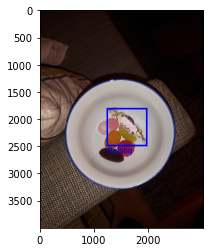

In [79]:
# Get a annotation file

index = 24
annotation_file = annotation_names[index]

#Get the corresponding image file
image_file = annotation_file.replace("Annotations", "Pictures").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
print(image_file)
print(image_file[-5])
if image_file[-5] == "F":
    image = image.transpose(method=Image.FLIP_LEFT_RIGHT).transpose(method=Image.FLIP_TOP_BOTTOM)

if image_file[-5] == "R":
    image = image.transpose(Image.ROTATE_270)
    
# TODO: Place all images in a folder so that they get the right index. For flip and rotate indexes change name of image and
# Change if statements to trigger on image names.

#Plot the Bounding Box
plot_bounding_box(image, annotation_file, index in rotate)


In [51]:
# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(picture_names, annotation_names, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [52]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, pictures_paths[0])
move_files_to_folder(val_images, pictures_paths[1])
move_files_to_folder(test_images, pictures_paths[2])
move_files_to_folder(train_annotations, annotations_paths[0])
move_files_to_folder(val_annotations, annotations_paths[1])
move_files_to_folder(test_annotations, annotations_paths[2])

200
200
